In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from pandas.tools.plotting import scatter_matrix

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.
data=pd.read_csv("Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data_priced = data[data.Price.notnull()].drop('Address', axis = 1)


In [4]:
#Correlation Matrix
corr_matrix = data_priced.corr()

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


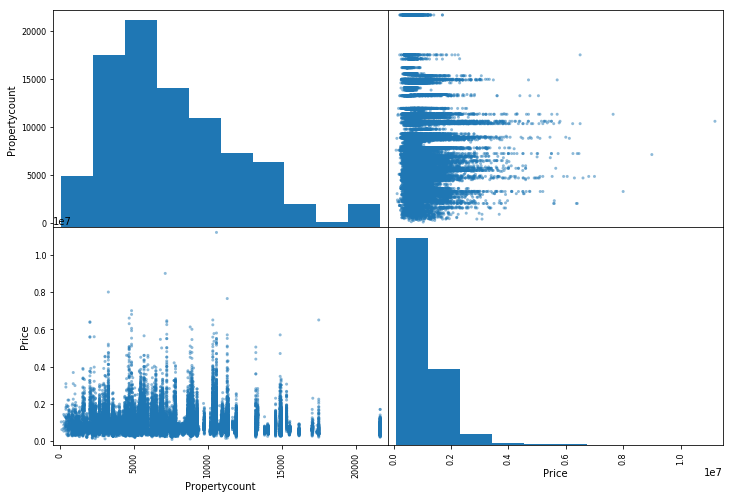

In [21]:

attributes = [ "Date","Price"]
scatter_matrix(data_priced[attributes], figsize=(12, 8))
#plt.savefig('matrix.png')
plt.show()

In [ ]:
data_p.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()


### Clubing features together - Location

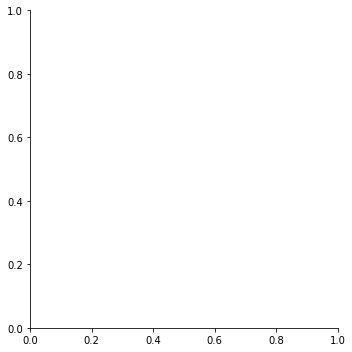

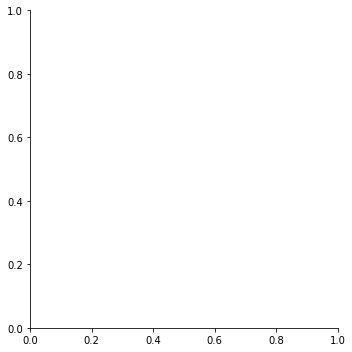

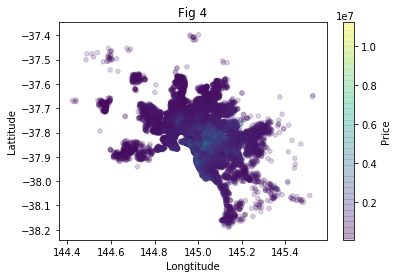

In [13]:
#most expensive to the least expensive areas
data_priced.plot(kind="scatter", x="Longtitude", y="Lattitude", c = "Price", alpha=0.2, colorbar=True, sharex=False, cmap=plt.get_cmap("viridis"))
plt.title('Fig 4')
plt.show()
#plt.savefig('map1.png')


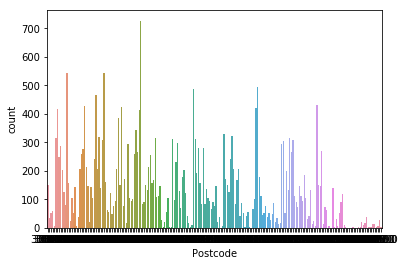

In [74]:
sns.countplot(x="Postcode", data=data_priced)

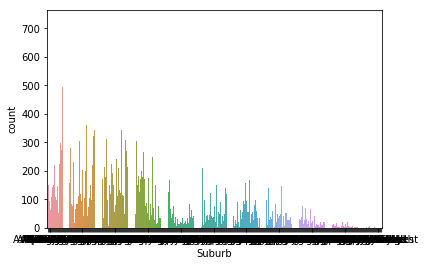

In [75]:
sns.countplot(x="Suburb", data=data_priced)

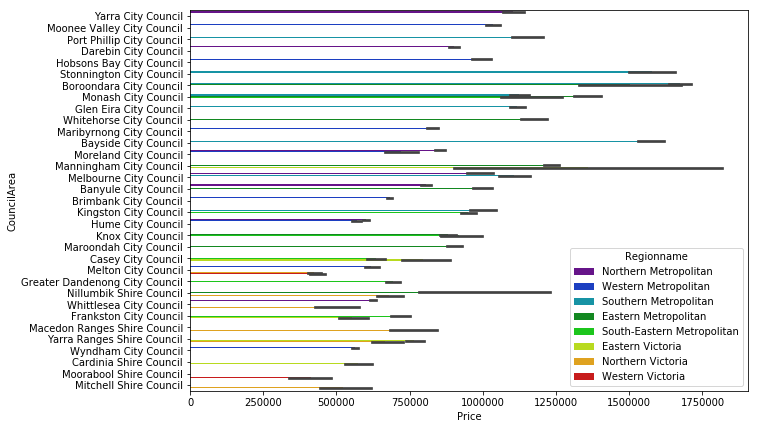

In [85]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x ='Price',y="CouncilArea", hue="Regionname", data=data_priced, palette="nipy_spectral");


### House based Attributes

In [17]:
data_priced['Landsize'].describe()

count     17982.000000
mean        593.488933
std        3757.266429
min           0.000000
25%         219.000000
50%         512.000000
75%         664.000000
max      433014.000000
Name: Landsize, dtype: float64

In [18]:
data_priced['Landsize'] = data_priced['Landsize'].apply(lambda x: np.log(x))


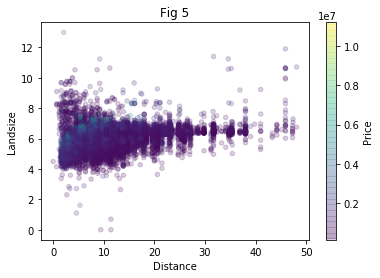

In [20]:
data_priced.plot(kind="scatter", x="Distance", y="Landsize", c = "Price", alpha=0.2, colorbar=True, sharex=False, cmap=plt.get_cmap("viridis"))
plt.title('Fig 5')
plt.show()